***
**3/10**

In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

넘파이처럼 벡터를 생성 할 수 있다.

In [2]:
A = torch.Tensor([0, 1, 2, 3])
A.type()

'torch.FloatTensor'

텐서의 모양과 크기

In [3]:
A.shape

torch.Size([4])

텐서의 차원 표시

In [ ]:
A.dim()

1

In [ ]:
B = torch.Tensor([[0.8425, 0.3970],
                  [0.5268, 0.7384],
                 [0.5639, 0.3080]])
B.shape

torch.Size([3, 2])

In [ ]:
B.dim()

2

In [ ]:
C = torch.Tensor([
    [[6, 4],
     [8, 0],
     [8, 4],
     [2, 4]],

    [[2, 8],
     [3, 6],
     [4, 7],
     [0, 9]],

    [[8, 0],
     [3, 9],
     [0, 5],
     [7, 3]]
])

C.shape

torch.Size([3, 4, 2])

### 인공신경망의 구조와 학습
#### 활성화 함수
- 먼저 활성화 함수는 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수
- 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, 렐루 함수 등이 있음

#### 시그모이드 함수
- 선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형
- 주로 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는데 사용
- 현재는 딥러닝 모델의 깊이가 깊어지면 기울기가 사라지는 '기울기 소멸 문제'가 발생하여 딥러닝 모델에서는 잘 사용하지 않음


#### 손실 함수
- 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표
- 값이 클수록 많이 틀리고, 0에 가까우면 완벽하게 추정할 수 있다는 의미

#### 크로스 엔트로피 오차 (분류의 손실함수)
- 크로스 엔트로피 분류 모델이 얼마나 잘 수행되는지 측정하기 위해 사용
- 0과 1 사이로 측정
- 주로 결과값이 3개 이상일때 사용, 결과값이 2개인 경우 Binary Cross Entropy Loss 사용 가능

#### 경사 하강법 (Gradient decent)
- 신경망 안의 가중치 조합을 모두 계산하면 시간이 오래걸리기 때문에 효율적으로 가중치를 업데이트 하기 위해 고안된 방법
- 함수의 기울기(경사)를 구하고 경사의 반대 방향으로 계속 이동시켜 최솟값에 이를 때까지 반복시키는 학습 방법
$$w'=w-α\frac{dL(y,y)}{dw}$$

##### 한계점
- 딥러닝은 일반적으로 데이터가 많음
- 수식 한번에 N(=데이터의 개수)번의 덧셈 수행
- 한번에 모든 데이터에 대한 계산을 한번에 하면 매우 많은 시간이 소요됨
- 또한, 한번에 계산하는 데이터가 너무 많으면 메모리가 부족해질 수 있음

### RMSProp (Root Mean Square Propagation)
최근 경로의 곡면 변화량에 따라 학습률을 적응적으로 결정하는 알고리즘
- 곡면 변화량을 측정할 때 전체 경로가 아닌 최근 경로의 변화량 측정, 최근 경로에 지수가중이동평균 적용


In [5]:
import torch.nn as nn

data = pd.read_excel('boston.xlsx')

model = nn.Sequential(
    nn.Linear(13, 100), # input이 13개
    nn.ReLU(), # 렐루 신경망 상수항 처리
    nn.Linear(100, 1) # 결과값이 1개
)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [7]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values

Y = data[['target']].values # 대괄호를 두개 써야 2차원 벡터로 나옴

In [8]:
# 데이터를 Train과 test로 나누는 패키지
from sklearn.model_selection import train_test_split

# 전체데이터를 Train(Train + Validation)과 Test로 나눔
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)
# Train을 다시 Train, Validation으로 나눔
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [9]:
# torch.Tensor(numpy 값): 변수를 numpy -> Tensor로 변환
x_train = torch.Tensor(X_train)
y_train = torch.Tensor(Y_train)
x_val = torch.Tensor(X_val)
y_val = torch.Tensor(Y_val)
x_test = torch.Tensor(X_test)
y_test = torch.Tensor(Y_test)

In [10]:
# 파이토치에서 미니배치를 변환을 도와주는 패키지
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

# 배치할 때, feature와 target이 동일하게 섞여야 함으로 먼저 TensorDataset으로 통합 데이터셋을 만든다.
# drop_last = 나머지 데이터는 사용하지 않음
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, drop_last=True)

In [11]:
learning_rate = 0.001

# 최적화 학습 방법 선택 -> Adam
from torch.optim.adam import Adam
optim = Adam(model.parameters(), lr=learning_rate)

***
**3/11**

In [16]:
# Train과 validation에 대한 손실값의 history 저장을 위한 변수 선언
loss_train_record = []
loss_valid_record = []

torch.manual_seed(42) # Pytorch의 난수 생성기를 고정
for epoch in range(5000):
  for x, y in train_dataloader:
    optim.zero_grad() # 기울기 초기화

    preds_train = model(x) # 전방향 학습
    preds_valid = model(x_val)

    loss_train = nn.MSELoss()(preds_train, y) # 오차 계산
    loss_valid = nn.MSELoss()(preds_valid, y_val)

    loss_train.backward() # 역전파 학습
    optim.step() # 기울기 업데이트

  loss_train_record.append(loss_train.item()) # 손실값 저장
  loss_valid_record.append(loss_valid.item())
  if epoch % 1000 == 0: # 1000번 학습 때 마다 결과를 보여줌
    print(f'epoch{epoch} loss:{loss_train.item()}, loss_valid:{loss_valid.item()}')

epoch0 loss:1827.7716064453125, loss_valid:2070.126708984375
epoch1000 loss:5.49819278717041, loss_valid:23.76006507873535
epoch2000 loss:3.760148525238037, loss_valid:20.706520080566406
epoch3000 loss:4.77147102355957, loss_valid:17.294618606567383
epoch4000 loss:3.580383777618408, loss_valid:16.02872657775879


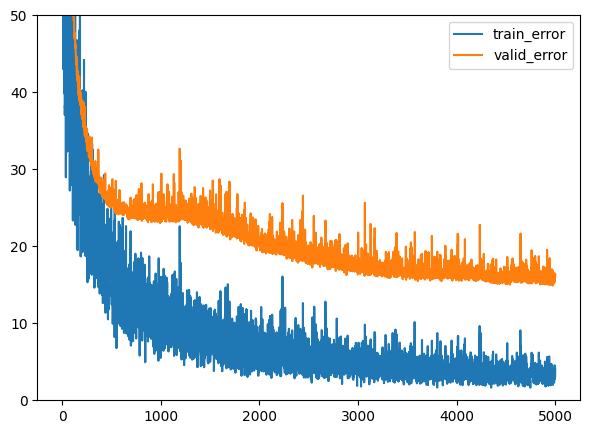

In [18]:
# 손실값의 변화를 그림으로 표시
plt.figure(figsize=(7, 5))
plt.plot(loss_train_record, label='train_error')
plt.plot(loss_valid_record, label='valid_error')
plt.ylim([0, 50])
plt.legend()
plt.show()

In [19]:
preds_test = model(x_test)
preds_test

tensor([[24.0321],
        [32.0693],
        [15.0880],
        [22.4142],
        [16.3109],
        [19.2310],
        [20.3044],
        [17.9523],
        [18.9967],
        [21.1947],
        [20.5320],
        [23.8552],
        [ 2.9242],
        [20.3595],
        [17.6815],
        [22.1818],
        [19.6690],
        [11.7104],
        [46.1959],
        [13.0575],
        [26.1957],
        [25.4007],
        [14.1485],
        [23.2724],
        [18.2494],
        [17.3965],
        [21.9292],
        [12.6097],
        [17.8124],
        [20.3732],
        [20.3120],
        [25.2289],
        [23.3897],
        [25.7730],
        [13.4760],
        [20.5191],
        [30.3308],
        [18.5563],
        [22.7291],
        [24.0303],
        [16.9226],
        [27.6190],
        [49.8286],
        [17.4264],
        [23.5914],
        [14.1823],
        [14.8077],
        [25.2423],
        [17.0806],
        [30.5071],
        [24.8642],
        [36.2475],
        [18.

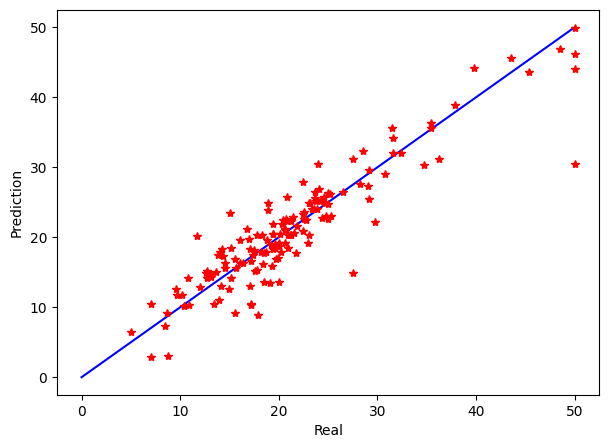

In [20]:
with torch.no_grad(): # 아래 코드에 grad 함수 제거
  plt.figure(figsize=(7, 5))
  x = np.linspace(0, 50, 1000)
  y = x
  plt.plot(x, y, 'b')
  plt.plot(y_test, preds_test, '*r')
  plt.xlabel('Real')
  plt.ylabel('Prediction')
  plt.show()

손실 함수는 예측값 일치를 나타내는 지표가 되지 못함
### 결정계수 (coefficient of determination)
- 회귀 분석에 의해 도출된 목적 변수의 예측 값이 실제 목적 변수의 값과 어느정도 일치하는가를 표시하는 지표
(1에 가까울수록 높은 일치도)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, preds_test.detach())

0.8344053904501185

### PyT에서 GPU 사용 규칙
1. 텐서 변수는 데이터가 CPU와 GPU 중 어디에 속해 있는지를 속성으로 갖는다.
2. CPU와 GPU 사이에서 데이터는 to 함수로 전송한다.
3. 두 개의 변수가 모두 GPU에 올라가 있는 경우, 연산은 GPU로 수행한다.
4. 두 변수 중 한쪽이 CPU, 다른 한쪽이 GPU에 올라가 있는 경우, 연산은 에러를
발생시킨다.